In [2]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=4)
import matplotlib.pyplot as plt
import cv2

from skimage.transform import resize, pyramid_reduce
import sys
import time

# import from the eggnog_preprocessing repo
sys.path.append('../../eggnog_preprocessing/preprocessing/')
import read_videos_write_img_paf_hm as prep

from skimage import io

In [3]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=1.0)
#         plt.colorbar()
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

# def show_subplots(n_subplots)
    

In [678]:
# raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014908_00_Video/"
# file_pre = "20151114_014908_00_Video_vfr_497_skfr_487"

# test output
test_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_train/part1_layout_p14/"
test_file_pre = "20151116_230338_00_Video"

# test_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/training_files/from_scratch/0328180100pm/testing/"
# test_file_pre = "20151116_230144_00_Video_vfr_1005_skfr_996_240x320_test"
# test_file_pre = "20151113_224707_00_Video_vfr_1015_skfr_990_240x320_test"


# ground truth
gt_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07/part1_layout_p14/20151116_230144_00_Video/"
gt_file_pre = "20151116_230144_00_Video_vfr_1005_skfr_996"
# gt_raw_data_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s04/part1_layout_p08/20151113_224707_00_Video/"
# gt_file_pre = "20151113_224707_00_Video_vfr_1015_skfr_990"




test_image_file_path /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/20151114_014811_00_Video_vfr_6_skfr_5_aug_0_240x320.jpg
original transformed rgb image =


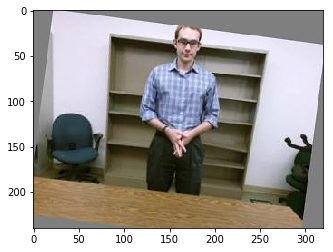

video_name, vfr, skfr = 20151114_014811_00_Video 6 5


In [26]:
## list directory of output transformed images
transformed_dir = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/" 
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s04/part2_layout_p07/20151113_230303_00_Video_augmented/" 
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/" 
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video/" 
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video/"
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r2/"

tx_imgs = [im for im in sorted(os.listdir(transformed_dir)) if im.endswith('.jpg')]
# print("tx_imgs len and [0]", len(tx_imgs), tx_imgs[0])

image_idx = 225


# original image 240x320
# test_image_file_path = os.path.join(gt_raw_data_path, gt_file_pre + '_240x320.jpg')
test_image_file_path = os.path.join(transformed_dir, tx_imgs[image_idx])
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_train/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_90_skfr_90_240x320_transformed.jpg"
print("test_image_file_path", test_image_file_path)

original_image = cv2.imread(test_image_file_path)  # B,G,R order
rgb_image = original_image[:,:,[2,1,0]]
down_image = pyramid_reduce(rgb_image, downscale=8)

print("original transformed rgb image =")
plt.figure(0)
plt.imshow(rgb_image)  
plt.show()

### search the video for this image
video_name = tx_imgs[image_idx].split('_vfr')[0]
name_part2 = tx_imgs[image_idx].split('_vfr')[1].split('_')
vfr = int(name_part2[1])
skfr = int(name_part2[3])
print("video_name, vfr, skfr =", video_name, vfr, skfr)


# print("=============================================")
# # search video_name in folder /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm
# dataset_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/"
# video_folder = "s04/part2_layout_p07/"  # "s04/part1_layout_p08/"
# video_path = os.path.join(dataset_path, video_folder, video_name + ".avi")
# print("video_file_path", video_path)


# #1 original full image and original sk kp
# xyz_skeleton_data, rgb_skeleton_data = prep.load_skeleton_data_for_video(video_path)
# frame_dict = prep.load_frames_file(video_path)
# vfr_time = frame_dict[vfr]
# print("vfr_time", vfr_time)
# print("len frame_dict", len(frame_dict.keys()))

# print("rgb_skeleton_data", rgb_skeleton_data.shape, rgb_skeleton_data[..., 0].shape)
# nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[vfr])
# print("nearest_idx, nearest_time", nearest_idx, nearest_time)
# print("", rgb_skeleton_data[nearest_idx+1], rgb_skeleton_data[nearest_idx-1])

# print("rgb nearest", nearest_time, nearest_idx, rgb_skeleton_data[nearest_idx])
# rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,2))
# print("rgb kp", rgb_kp)

# cap = cv2.VideoCapture(video_path)
# assert(cap.isOpened() == True)

# cap.set(cv2.CAP_PROP_POS_FRAMES, vfr)
# success, frame = cap.read()  # frame is read as (h, w, c)
# if success:
#     print("frame.shape", frame.shape)
#     img_full = frame[...,::-1]
#     img_central = img_full[:, 240:(1920-240), :]
#     print("original full rgb image =")
#     plt.figure()
#     plt.imshow(img_full)  
#     plt.show()
    
    

In [106]:
### video visualization with opencv
print("reading video", video_path)

cap = cv2.VideoCapture(video_path)
assert(cap.isOpened() == True)
for k in frame_dict.keys():
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    # input("press anything to continue")
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,2))
            cap.set(cv2.CAP_PROP_POS_FRAMES, k)
            success, frame = cap.read()  # frame is read as (h, w, c)
            if success and k%30==0:
                img_full = frame[...,::-1]
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    
                    

NameError: name 'video_path' is not defined

In [7]:
### video visualization with pyav-genereted images
pyav_images_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/pyav_test/20151113_230303_00_Video/"

for k in frame_dict.keys():
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    # input("press anything to continue")
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,2))
            
            frame_path = pyav_images_path + video_name + "_vfr_" + str(k) + "_skfr_00000_1920x1080.jpg"
            frame = io.imread(frame_path)
            
            if k%30==0:
                img_full = frame[...,::-1]
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    
                    

NameError: name 'frame_dict' is not defined

In [50]:
k = 5500
cap = cv2.VideoCapture(video_path)
assert(cap.isOpened() == True)
print("k", k)
print("dict", len(frame_dict.keys()))
cap.set(cv2.CAP_PROP_POS_FRAMES, k)
success, frame = cap.read()
if success:
    print("frame.shape", frame.shape)
    img_full = frame[...,::-1]
    print("original full rgb image =")
    plt.figure()
    plt.imshow(img_full)  
    plt.show()
    
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("n_frames according to opencv", length)

"""
ISSUE: http://answers.opencv.org/question/98329/videocapture-unable-to-read-large-avi-files-wrong-frame-count/
n_frames according to opencv 5548

mplayer gives the same number as opencv
/usr/local/mplayer/bin/mplayer /s/red/a/nobackup/cwc/data/userstudies/initial_study_xef/s04/part2_layout_p07/20151113_230303_00_Video.avi
A: 184.9 V: 184.9 A-V: -0.017 ct: -0.137 5548/5548 12%  0%  0.1% 0 0 
BUT
ffprobe gives:

rally-king:~/Desktop$ /s/parsons/h/proj/vision/usr/rahul/local/bin/ffprobe -v error -count_frames -select_streams v:0   -show_entries stream=nb_read_frames -of default=nokey=1:noprint_wrappers=1 /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s04/part2_layout_p07/20151113_230303_00_Video.avi 
4662

This number matches the number of lines in the .frames file.

"""

NameError: name 'video_path' is not defined

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/20151114_014811_00_Video_vfr_6_skfr_5_aug_0_heatmap30x40.npy
test heatmap shape (30, 40, 20)


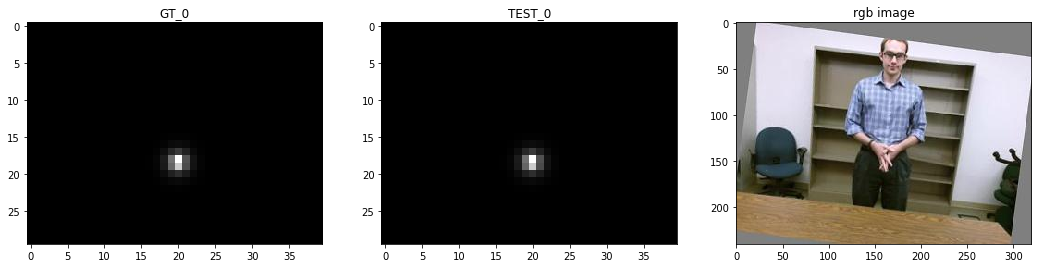

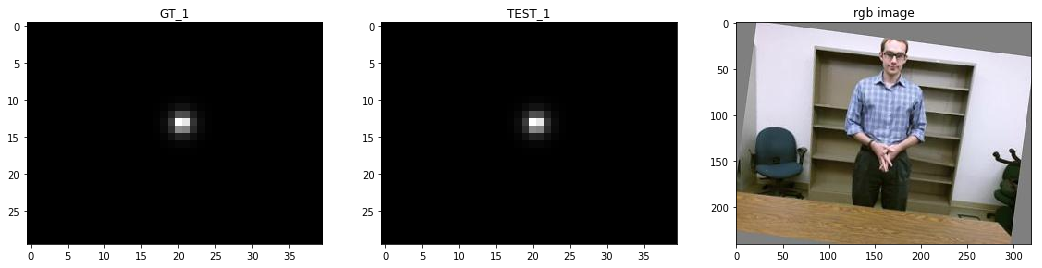

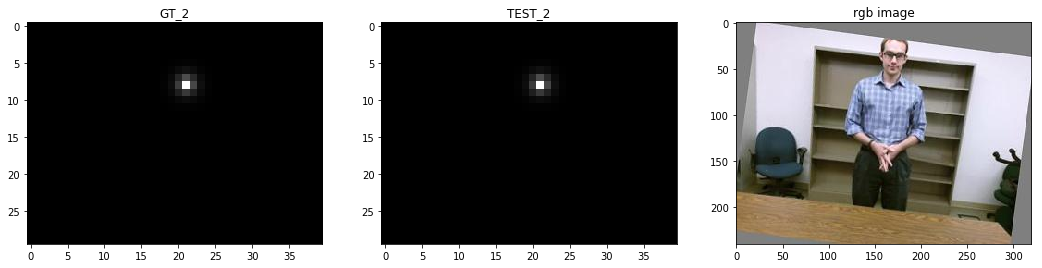

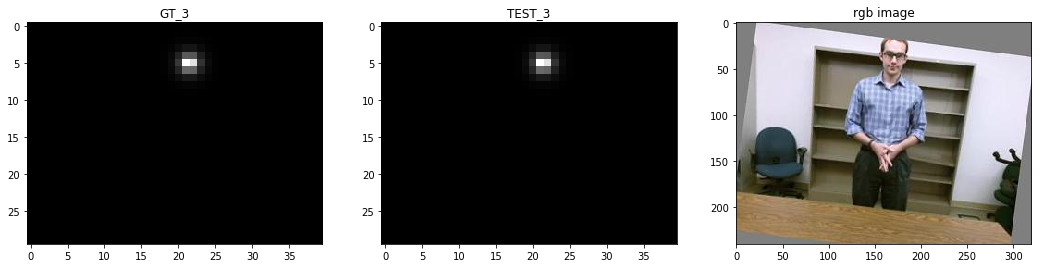

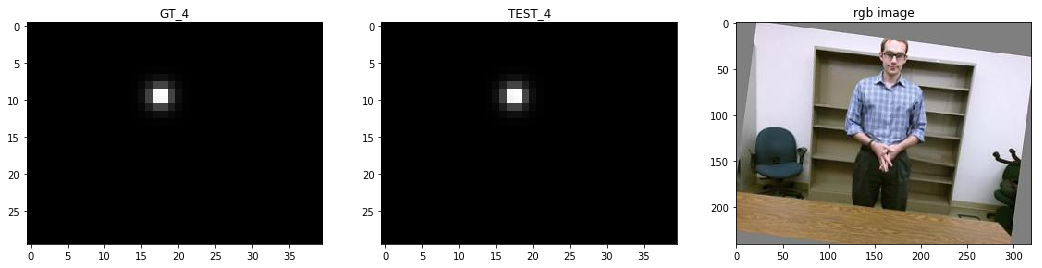

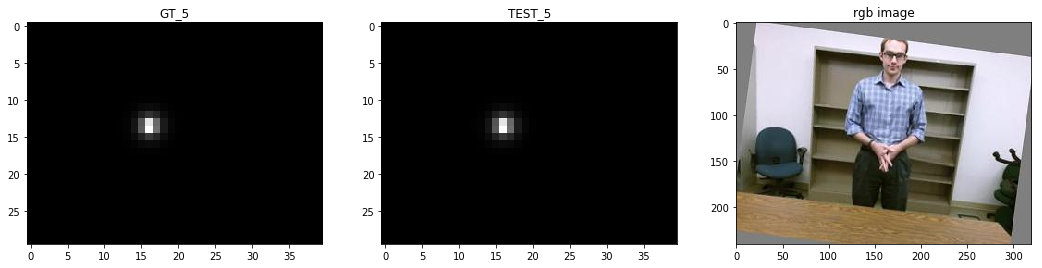

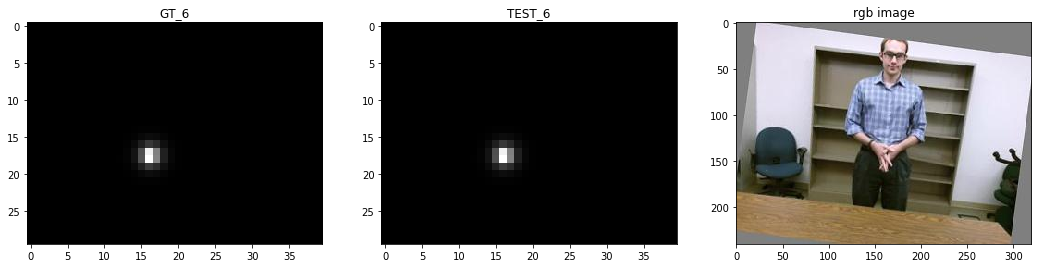

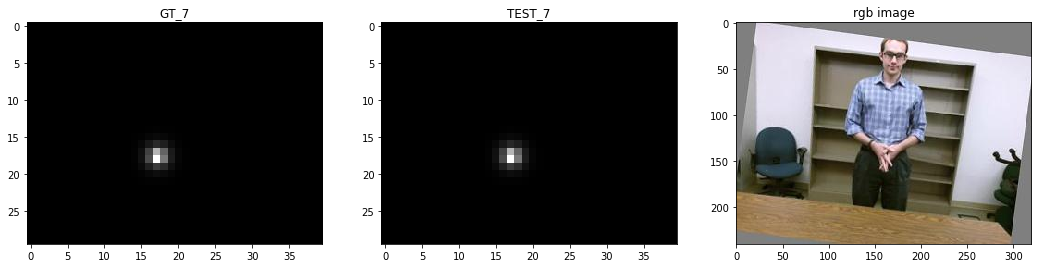

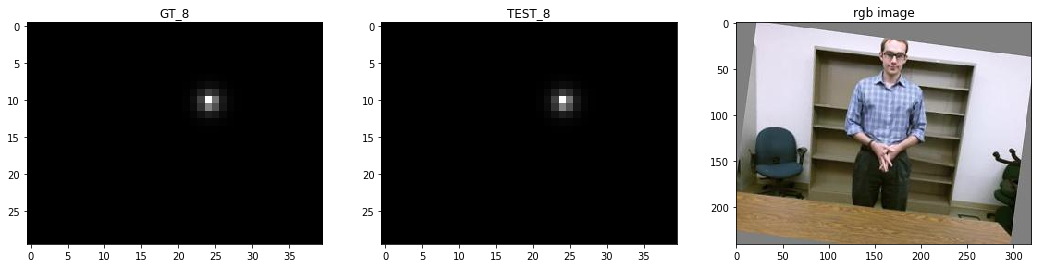

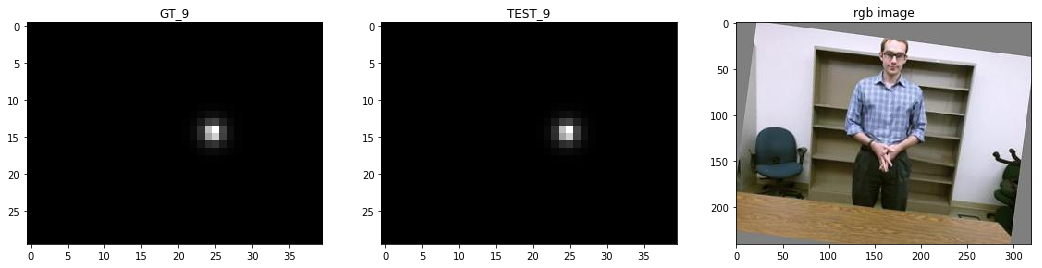

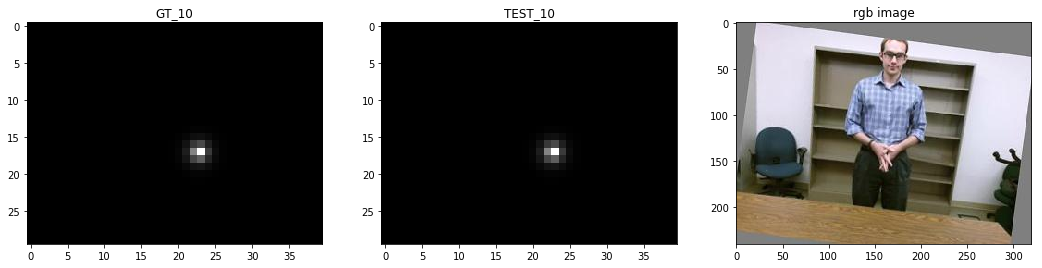

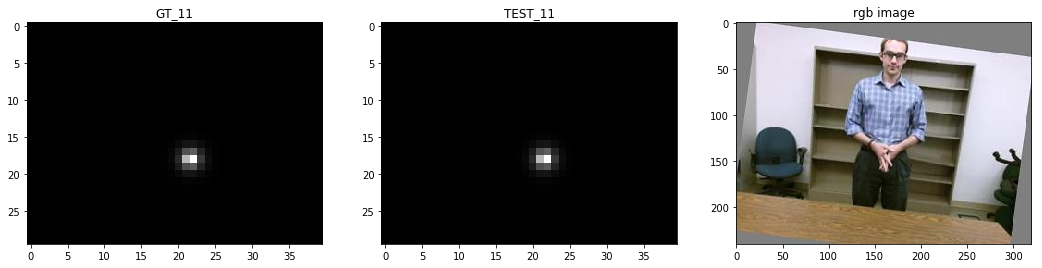

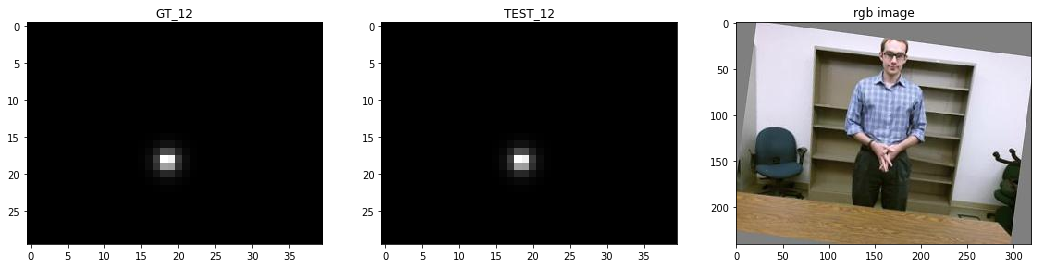

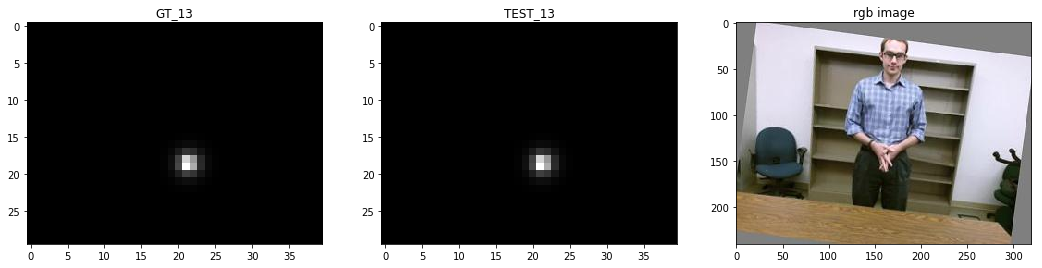

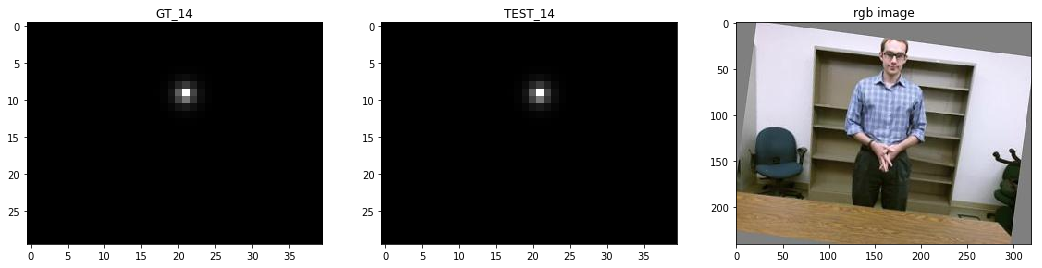

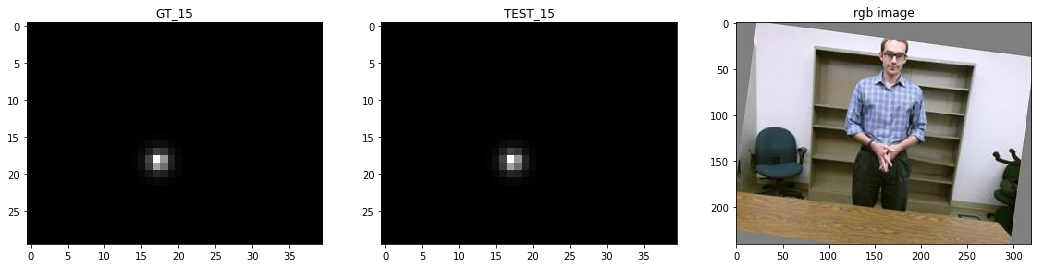

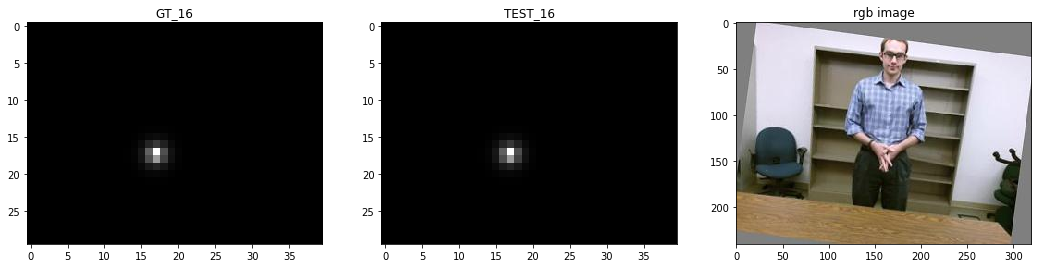

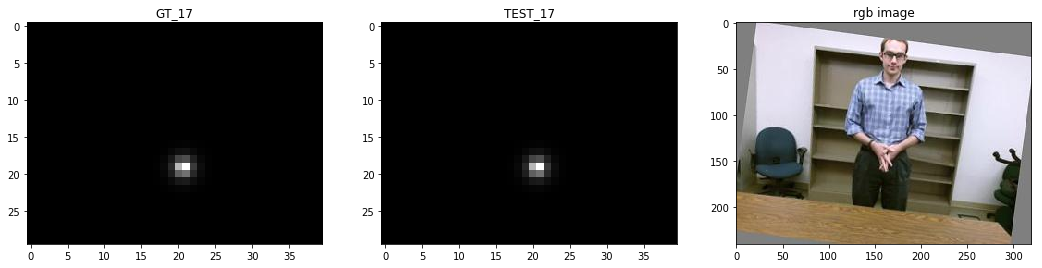

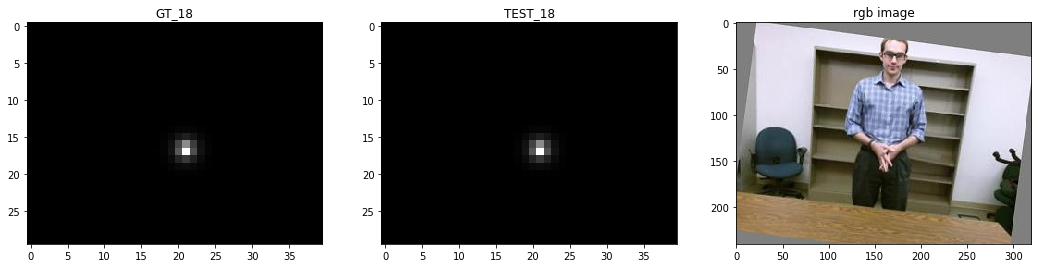

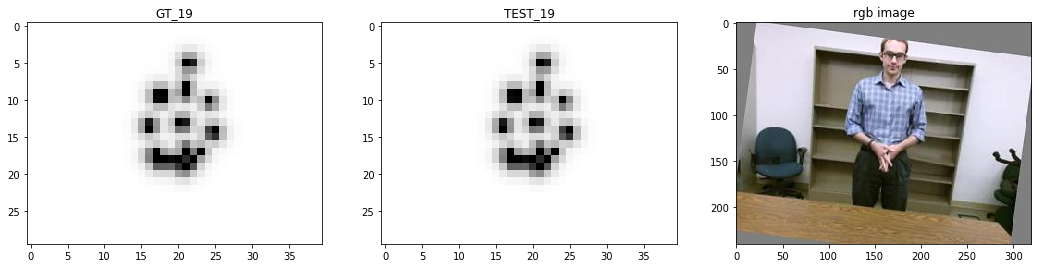

bk_hm shape (30, 40)
RGB image


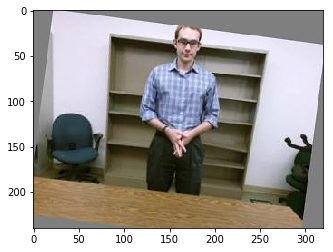

heatmap test


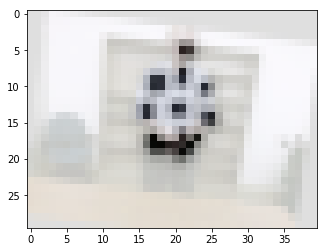

In [27]:
# show heatmaps

# test_heatmap_file_path = os.path.join(test_raw_data_path, test_file_pre + '_heatmap30x40.npy')
test_heatmap_file_path = test_image_file_path.replace("240x320", "heatmap30x40").replace(".jpg", ".npy")
print(test_heatmap_file_path)
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_train/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_90_skfr_90_heatmap30x40_transformed.npy"

# gt_heatmap_file_path = os.path.join(gt_raw_data_path, gt_file_pre + '_heatmap30x40.npy')
# gt_heatmap_file_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s07/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_80_skfr_80_heatmap30x40.npy"
gt_heatmap_file_path = test_heatmap_file_path

test_heatmap = np.load(test_heatmap_file_path)
print("test heatmap shape", test_heatmap.shape)  # (30, 40, 20)
gt_heatmap = np.load(gt_heatmap_file_path)

images = []  # a list containing alternated test_hm and gt_hm
titles = []  # titles for images above
len_hm = test_heatmap.shape[2]


for i in range(test_heatmap.shape[2]):
#     if i == test_heatmap.shape[2] - 1:
    #2 faster
    images.append(gt_heatmap[:,:,i])  #
    images.append(test_heatmap[:,:,i])  #
    images.append(rgb_image)

    titles.append('GT_' + str(i))
    titles.append('TEST_' + str(i))
    titles.append('rgb image')

    show_images(images, 1, titles)
    images = []
    titles = []


bk_hm = test_heatmap[:,:,len_hm-1]
print("bk_hm shape", bk_hm.shape)

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("heatmap test")
plt.figure(5)
plt.imshow(bk_hm, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.25)
plt.show()
    
#     #1 slow!!!
#     images.append(gt_heatmap[:,:,i])  #
#     images.append(test_heatmap[:,:,i])  # 
#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
    
#     if i == 19:
#         plt.figure(1) 
#         plt.imshow(test_heatmap[:,:,i], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)  
#         plt.show()
#         print("max, min, test_heatmap i = ", test_heatmap[:,:,i].max(), test_heatmap[:,:,i].min())

# # original image
# images.append(rgb_image)
# titles.append('rgb image')
# print("images len", len(images))
# show_images(images, 11, titles)


# if success:
#     print("frame.shape", frame.shape)
#     img_full = frame[...,::-1]
#     img_central = img_full[:, 240:(1920-240), :]
#     print("original full rgb image =")
#     plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
#     plt.imshow(img_full, alpha=0.25)
#     plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
#     for p in paf_pairs_indices:
# #         print(p)
# #         print([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]])
# #         print(rgb_kp[p[0]], rgb_kp[p[1]])
#         plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
# #         plt.plot(rgb_kp[p[0]], rgb_kp[p[1]], 'b-', lw=1)
        
#     plt.show()
    

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/20151114_014811_00_Video_vfr_6_skfr_5_aug_0_paf30x40.npy
test paf shape (30, 40, 36)
RGB image


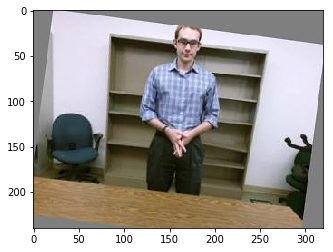

paf test


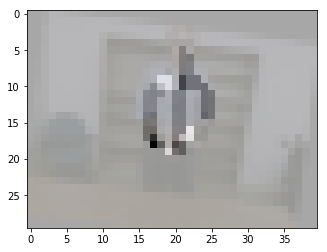

In [29]:
# show pafs

# test_paf_file_path = os.path.join(test_raw_data_path, test_file_pre + '_paf30x40.npy')
test_paf_file_path = test_image_file_path.replace("240x320", "paf30x40").replace(".jpg", ".npy")
print(test_paf_file_path)
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_train/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_80_skfr_80_paf30x40_transformed.npy"

# gt_paf_file_path = os.path.join(gt_raw_data_path, gt_file_pre + '_paf30x40.npy')
# gt_paf_file_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s07/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_80_skfr_80_paf30x40.npy"
gt_paf_file_path = test_paf_file_path

test_paf = np.load(test_paf_file_path)
print("test paf shape", test_paf.shape)  # (30, 40, 36)
gt_paf = np.load(gt_paf_file_path)

summed_test_paf = np.sum(test_paf, axis=2)
summed_gt_paf = np.sum(gt_paf, axis=2)
# summed_pafx = np.zeros((paf.shape[0], paf.shape[1]))
# summed_pafy = np.zeros((paf.shape[0], paf.shape[1]))

images = []  # a list containing alternated test_paf and gt_paf
titles = []  # titles for images above

# for i in range(test_paf.shape[2]):
    
#     #2  faster!
#     images.append(gt_paf[:,:,i])
#     images.append(test_paf[:,:,i])
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')
    
#     show_images(images, 1, titles)
#     images = []
#     titles = []
    
    
    #1  slow!!!
#     images.append(gt_paf[:,:,i])  #
#     images.append(test_paf[:,:,i])  # 
#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     if i%2 == 0:
#         summed_pafx = summed_pafx + paf[:,:,i]
#     else:
#         summed_pafy = summed_pafy + paf[:,:,i]


# original image
# images.append(rgb_image)
# titles.append('rgb image')
# print("images len", len(images))
# start_t = time.time()
# # show_images(images, 38, titles)
# end_t = time.time()


# print("total time = ", end_t-start_t)
# plt.figure(2)
# plt.imshow(summed_pafx/paf.shape[2]/2, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)  
# plt.show()

# plt.figure(3)
# plt.imshow(summed_pafy/paf.shape[2]/2, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)  
# plt.show()

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("paf test")
plt.figure(4)
plt.imshow(summed_test_paf, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.15)
plt.show()

# print("paf gt")
# plt.figure(5)
# plt.imshow(summed_gt_paf, cmap=plt.get_cmap('gray'))  
# plt.show()

paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
                    [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
                    [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
                    [14, 2], [2, 3]
                    ]




In [188]:
# numpy reading keypoints

test_kp_file_path = test_image_file_path.replace("_240x320", "").replace(".jpg", ".npy")
print(test_kp_file_path)

kp = np.load(test_kp_file_path)
print("kp shape", kp.shape, kp)

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/20151114_014811_00_Video_vfr_17_skfr_16_3.npy


FileNotFoundError: [Errno 2] No such file or directory: '/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_augmented/20151114_014811_00_Video_vfr_17_skfr_16_3.npy'

In [506]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    



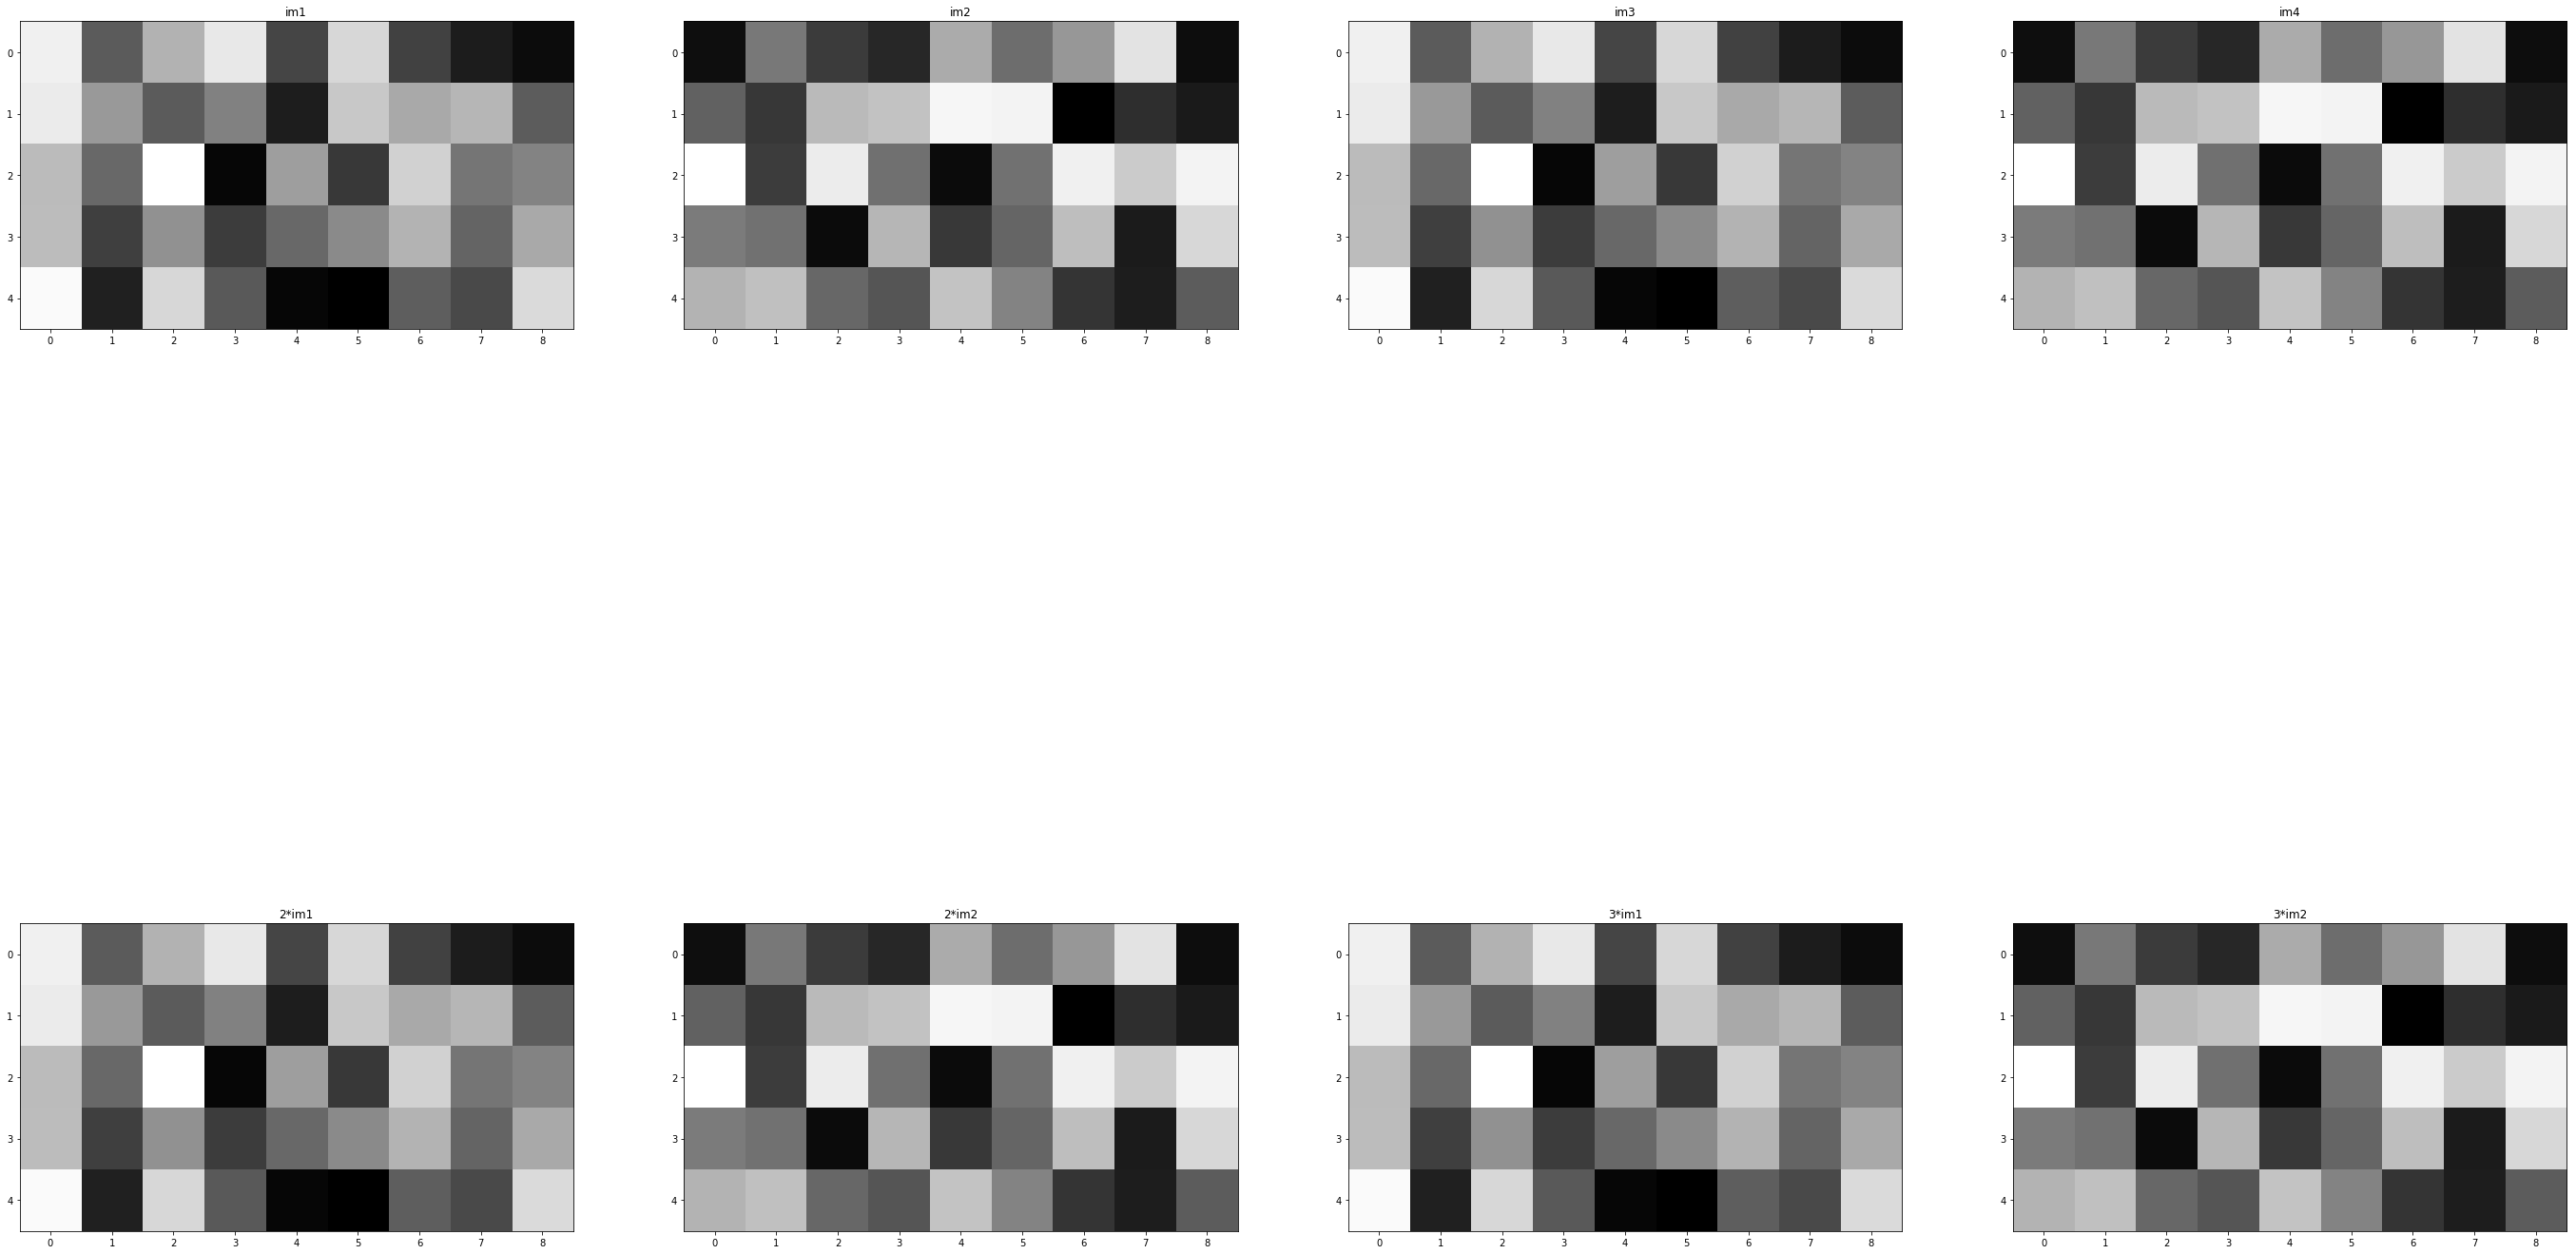

In [486]:
im1  = np.random.rand(5,9)
im2  = np.random.rand(5,9)
images = [im1, im2, im1, im2, 2*im1, 2*im2, 3*im1, 3*im2]
titles = ['im1', 'im2', 'im3', 'im4', '2*im1', '2*im2', '3*im1', '3*im2']

show_images(images, 2, titles)

(30, 40, 20)


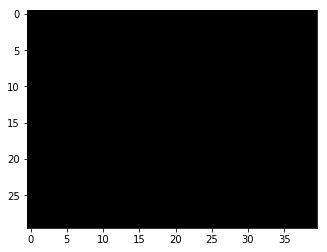

max, min, heatmap i =  0.0 0.0


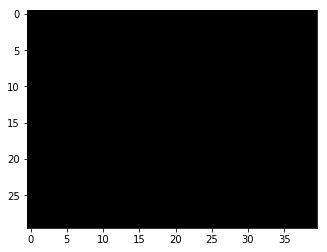

max, min, heatmap i =  0.0 0.0


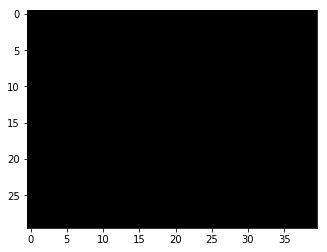

max, min, heatmap i =  0.0 0.0


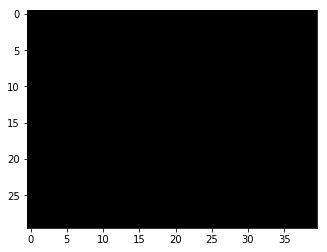

max, min, heatmap i =  0.0 0.0


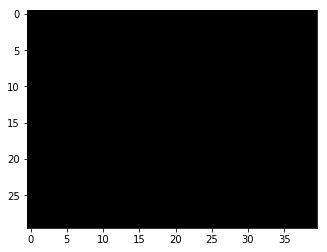

max, min, heatmap i =  0.0 0.0


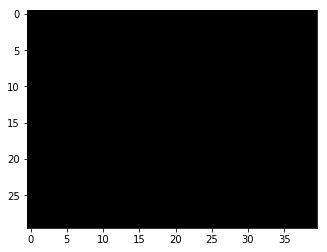

max, min, heatmap i =  0.0 0.0


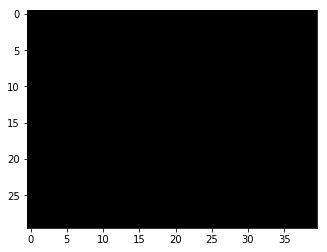

max, min, heatmap i =  0.0 0.0


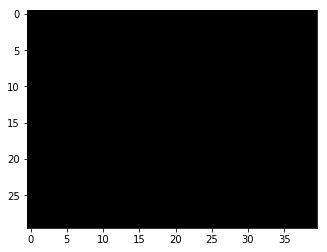

max, min, heatmap i =  0.0 0.0


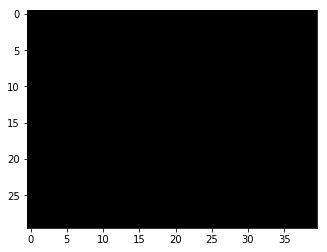

max, min, heatmap i =  0.0 0.0


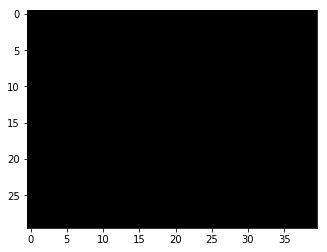

max, min, heatmap i =  0.0 0.0


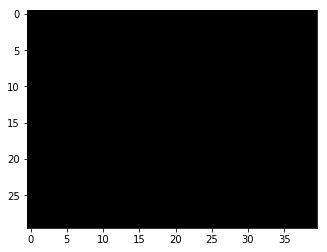

max, min, heatmap i =  0.0 0.0


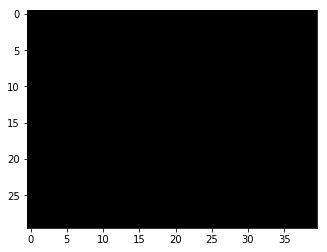

max, min, heatmap i =  0.0 0.0


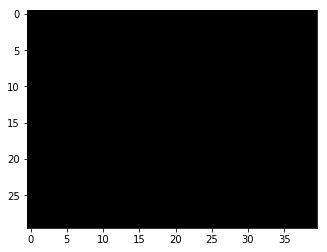

max, min, heatmap i =  0.0 0.0


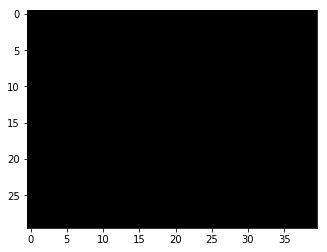

max, min, heatmap i =  0.0 0.0


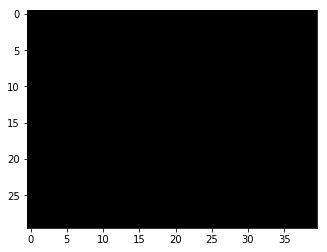

max, min, heatmap i =  0.0 0.0


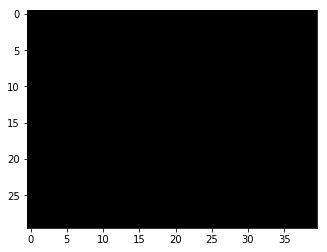

max, min, heatmap i =  0.0 0.0


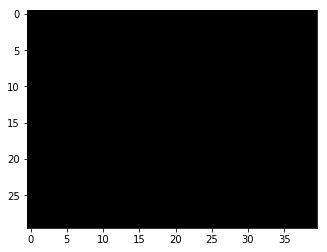

max, min, heatmap i =  0.0 0.0


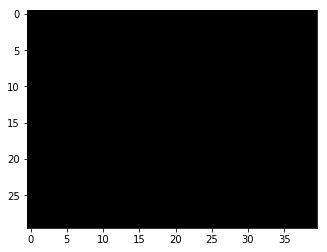

max, min, heatmap i =  0.0 0.0


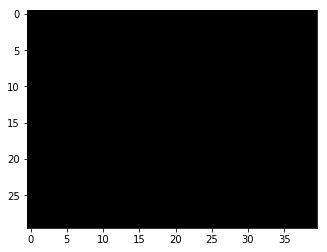

max, min, heatmap i =  0.0 0.0


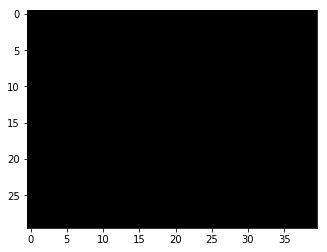

max, min, heatmap i =  0.0 0.0


In [43]:
# show heatmaps
heatmap = np.load("/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_val/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_5_skfr_4_heatmap30x40_transformed.npy")
print(heatmap.shape)  # (30, 40, 20)

# summed_heatmap = np.sum(heatmap, axis=2)/20

for i in range(heatmap.shape[2]):
    # print("heatmap i = ", i)

    if i != 100:
        plt.figure(1) 
        plt.imshow(heatmap[:,:,i], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)  
        plt.show()
        
        print("max, min, heatmap i = ", heatmap[:,:,i].max(), heatmap[:,:,i].min())